In [2]:
import pandas as pd
from pprint import pprint
import requests
from config import ClientID,ClientSecret

In [3]:
AUTH_URL = "https://accounts.spotify.com/api/token"
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': ClientID,
    'client_secret': ClientSecret,
})

#Convert response to JSON
auth_response_data = auth_response.json()

#Save the access token
access_token = auth_response_data['access_token']

#Need to pass access token into header to send properly formed GET request to API server
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [4]:
BASE_URL = 'https://api.spotify.com/v1/' 
search_BASE_URL=f"{BASE_URL}search?"

In [5]:
Charts=pd.read_csv("Resources/MusicCharts.csv")
Charts
Charts.rename(columns={"year":"Year",
                      "position":"Position",
                      "artist":"Artist",
                      "song":"Song"},inplace=True)
Charts=Charts[["Year","Position","Artist","Song"]]

In [6]:
Year2000=Charts.loc[Charts["Year"]==2000]
Year2001=Charts.loc[Charts["Year"]==2001]
Year2002=Charts.loc[Charts["Year"]==2002]
Year2003=Charts.loc[Charts["Year"]==2003]
Year2004=Charts.loc[Charts["Year"]==2004]
Year2005=Charts.loc[Charts["Year"]==2005]
Year2006=Charts.loc[Charts["Year"]==2006]
Year2007=Charts.loc[Charts["Year"]==2007]
Year2008=Charts.loc[Charts["Year"]==2008]
Year2009=Charts.loc[Charts["Year"]==2009]
Year2010=Charts.loc[Charts["Year"]==2010]
Year2011=Charts.loc[Charts["Year"]==2011]
Year2012=Charts.loc[Charts["Year"]==2012]
Year2013=Charts.loc[Charts["Year"]==2013]
Year2014=Charts.loc[Charts["Year"]==2014]
Year2015=Charts.loc[Charts["Year"]==2015]
Year2016=Charts.loc[Charts["Year"]==2016]
Year2017=Charts.loc[Charts["Year"]==2017]
Year2018=Charts.loc[Charts["Year"]==2018]
Year2019=Charts.loc[Charts["Year"]==2019]
Year2020=Charts.loc[Charts["Year"]==2020]
Year2021=Charts.loc[Charts["Year"]==2021]

In [7]:
def spotifyuri(df): 
    
    tempyear=df.iloc[0,0]
    print(f"{tempyear}")
        
    for index in df.index:

        artist1=[]
        artist1=df.loc[index,"Artist"].split(" & ")

        searchterm=f'{df.loc[index,"Song"]}'

        for art in range(len(artist1)):
            searchterm=f'{searchterm} {artist1[art]}'

        searchtype="track"
        params={"q":{searchterm},
           "type":{searchtype}}
        info=requests.get(search_BASE_URL ,params=params, headers=headers).json()

        try: 
            album=info["tracks"]["items"][0]["album"]["name"]
            df.loc[index,"Album"]=album
            uri=info["tracks"]['items'][0]['uri']
            df.loc[index,"Track URI"]=uri
            urisplit=uri.split(":")
            tempuri=urisplit[2]
            df.loc[index,"Spotify URI Code"]=tempuri

        except IndexError:

            song=df.loc[index,"Song"]
            number=df.loc[index,"Position"]
            print(f"\nFailure to locate: {song} (Position:{number})\n")
            df.loc[index,"Album"]=float("nan")
            df.loc[index,"Track URI"]=float("nan")
        
        URI=df.loc[index,"Spotify URI Code"]
        analysis=requests.get(f"https://api.spotify.com/v1/audio-features/{URI}",headers=headers).json()
        
        try:
            df.loc[index,"Acousticness"]=analysis["acousticness"]
            df.loc[index,"Danceability"]=analysis["danceability"]
            df.loc[index,"Duration"]=analysis["duration_ms"]
            df.loc[index,"Energy"]=analysis["energy"]
            df.loc[index,"Instrumentalness"]=analysis["instrumentalness"]
            df.loc[index,"Liveness"]=analysis['liveness']
            df.loc[index,"Loudness"]=analysis['loudness']
            df.loc[index,"Speechiness"]=analysis['speechiness']
            df.loc[index,"Tempo"]=analysis['tempo']
            df.loc[index,"Valence"]=analysis['valence']
            
        except KeyError:
            df.loc[index,"Acousticness"]=float("nan")
            df.loc[index,"Danceability"]=float("nan")
            df.loc[index,"Duration"]=float("nan")
            df.loc[index,"Energy"]=float("nan")
            df.loc[index,"Instrumentalness"]=float("nan")
            df.loc[index,"Liveness"]=float("nan")
            df.loc[index,"Loudness"]=float("nan")
            df.loc[index,"Speechiness"]=float("nan")
            df.loc[index,"Tempo"]=float("nan")
            df.loc[index,"Valence"]=float("nan")

        
    df.dropna(how="any",inplace=True)
    
    return df

In [8]:
searchtype="track"
params={"q":"Ed Sheerean",
       "type":{searchtype}}
info=requests.get(search_BASE_URL ,params=params, headers=headers).json()
pprint(info)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Ed+Sheerean&type=track&offset=0&limit=20',
            'items': [{'album': {'album_type': 'single',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4nDoRrQiYLoBzwC5BhVJzF'},
                                              'href': 'https://api.spotify.com/v1/artists/4nDoRrQiYLoBzwC5BhVJzF',
                                              'id': '4nDoRrQiYLoBzwC5BhVJzF',
                                              'name': 'Camila Cabello',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:4nDoRrQiYLoBzwC5BhVJzF'},
                                             {'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
                                              'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
                                

                       'external_ids': {'isrc': 'GBAHS1600463'},
                       'external_urls': {'spotify': 'https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3'},
                       'href': 'https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3',
                       'id': '7qiZfU4dY1lWllzX7mPBI3',
                       'is_local': False,
                       'name': 'Shape of You',
                       'popularity': 85,
                       'preview_url': 'https://p.scdn.co/mp3-preview/09e92af512355474ccf074988ea208ce6eb90a2b?cid=1bdba88ec3c9477d8b61636109a26244',
                       'track_number': 4,
                       'type': 'track',
                       'uri': 'spotify:track:7qiZfU4dY1lWllzX7mPBI3'},
                      {'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR'},
                                              'href': 'ht

                       'external_urls': {'spotify': 'https://open.spotify.com/track/1bhUWB0zJMIKr9yVPrkEuI'},
                       'href': 'https://api.spotify.com/v1/tracks/1bhUWB0zJMIKr9yVPrkEuI',
                       'id': '1bhUWB0zJMIKr9yVPrkEuI',
                       'is_local': False,
                       'name': 'Perfect Duet (Ed Sheeran & Beyoncé)',
                       'popularity': 80,
                       'preview_url': 'https://p.scdn.co/mp3-preview/9e1d78058053cc1e4dfc2c6b35040a5bc364f0a6?cid=1bdba88ec3c9477d8b61636109a26244',
                       'track_number': 1,
                       'type': 'track',
                       'uri': 'spotify:track:1bhUWB0zJMIKr9yVPrkEuI'},
                      {'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4WN5naL3ofxrVBgFpguzKo'},
                                              'href': 'https://api.spotify.com/v1/artists/4WN5naL3o

                                                       'TD',
                                                       'TG',
                                                       'TH',
                                                       'TJ',
                                                       'TL',
                                                       'TN',
                                                       'TO',
                                                       'TR',
                                                       'TT',
                                                       'TV',
                                                       'TW',
                                                       'TZ',
                                                       'UA',
                                                       'UG',
                                                       'US',
                                                       'UY',
                        

In [9]:
Year2000=spotifyuri(Year2000)
Year2001=spotifyuri(Year2001)
Year2002=spotifyuri(Year2002)
Year2003=spotifyuri(Year2003)
Year2004=spotifyuri(Year2004)
Year2005=spotifyuri(Year2005)
Year2006=spotifyuri(Year2006)
Year2007=spotifyuri(Year2007)
Year2008=spotifyuri(Year2008)
Year2009=spotifyuri(Year2009)
Year2010=spotifyuri(Year2010)
Year2011=spotifyuri(Year2011)
Year2012=spotifyuri(Year2012)
Year2013=spotifyuri(Year2013)
Year2014=spotifyuri(Year2014)
Year2015=spotifyuri(Year2015)
Year2016=spotifyuri(Year2016)
Year2017=spotifyuri(Year2017)
Year2018=spotifyuri(Year2018)
Year2019=spotifyuri(Year2019)
Year2020=spotifyuri(Year2020)
Year2021=spotifyuri(Year2021)

2000


/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



Failure to locate: I Wanna Know (Position:3)


Failure to locate: Hot Boyz (Position:56)


Failure to locate: Forgot About Dre (Position:64)



/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


2001

Failure to locate: Lady Marmalade (Voulez-Vous Coucher Aver Moi Ce Soir?) (Position:10)


Failure to locate: Stutter (Position:19)

2002

Failure to locate: Move B***h (Position:65)

2003

Failure to locate: Stand Up (Position:40)


Failure to locate: Can't Hold Us Down (Position:41)

2004

Failure to locate: Dip It Low (Position:15)


Failure to locate: Stand Up (Position:99)

2005

Failure to locate: 1-2 Step (Position:8)


Failure to locate: Lose Control (Position:19)


Failure to locate: Going Crazy (Position:92)

2006

Failure to locate: I'm In Love with A Stripper (Position:62)


Failure to locate: So What (Position:69)


Failure to locate: Show Stoppers (Position:83)

2007

Failure to locate: Let It Go (Position:68)


Failure to locate: Ein Stern (... der deinen Namen tragt) (Position:89)

2008
2009
2010

Failure to locate: What Do You Want From Me? (Position:36)


Failure to locate: Getting Over You (Position:39)

2011

Failure to locate: 6 Foot 7 Foot (Position:100)

201

In [10]:
Year=[Year2000,Year2001,Year2002,Year2003,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,
      Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2017,Year2018,Year2019,Year2020,Year2021]
AllYears=pd.concat(Year)

In [11]:
Mean=AllYears.groupby(["Year"]).mean()[["Acousticness","Danceability","Duration","Energy","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Valence"]]
Mean

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
Year,,,,,,,,,,
2000,0.123435,0.681928,242683.350515,0.747206,0.008970,0.146972,-5.965619,0.072770,117.642856,0.629312
2001,0.144382,0.666673,248720.408163,0.684367,0.030406,0.163820,-6.168990,0.107062,116.036388,0.588667
2002,0.141898,0.668374,246983.969697,0.725111,0.024081,0.162459,-5.757616,0.108503,117.825727,0.613366
2003,0.183242,0.666980,246208.214286,0.691633,0.026918,0.164055,-6.050133,0.131835,117.796153,0.602931
2004,0.168188,0.666602,244951.775510,0.690276,0.024930,0.167024,-5.902153,0.122333,117.136367,0.587228
2005,0.109626,0.687396,237224.343750,0.679760,0.020802,0.171779,-5.947604,0.124625,111.748844,0.563812
2006,0.111412,0.676433,239633.412371,0.697536,0.009367,0.188475,-5.751577,0.132531,118.781887,0.562595
2007,0.137601,0.660082,241403.306122,0.725122,0.010174,0.172478,-5.495122,0.109370,122.476765,0.566561
2008,0.123736,0.659600,230617.470000,0.723710,0.019754,0.174953,-5.518570,0.073401,126.608110,0.539547


<AxesSubplot:xlabel='Year'>

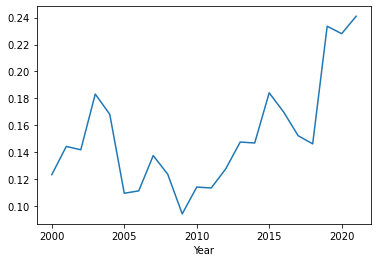

In [12]:
Mean["Acousticness"].plot()
print("Acousticness initially drops but then increases from 2009 onwards.")

Slight fluctutations.


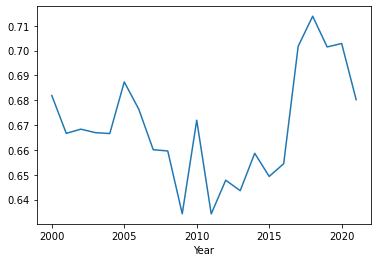

In [32]:
Mean["Danceability"].plot()
print("Slight fluctutations.")

<AxesSubplot:xlabel='Year'>

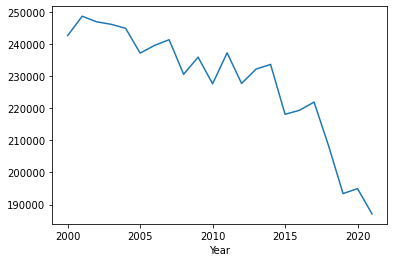

In [14]:
Mean["Duration"].plot()
print("Duration has significantly dropped.")

Energy dropped over the time period.


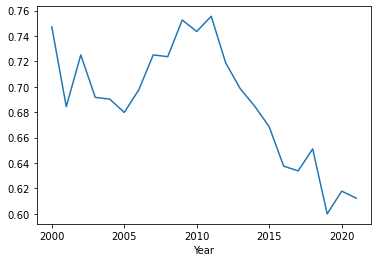

In [30]:
Mean["Energy"].plot()
print("Energy dropped over the time period.")

Instrumentalness did fluctuate but has a very small range of 0.035


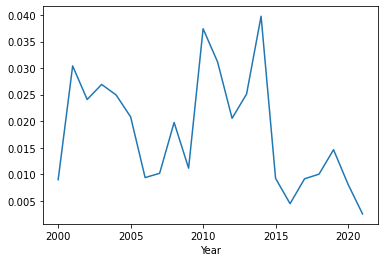

In [31]:
Mean["Instrumentalness"].plot()
print("Instrumentalness did fluctuate but has a very small range of 0.035")


Many flucatuations but range was very small at 0.05.


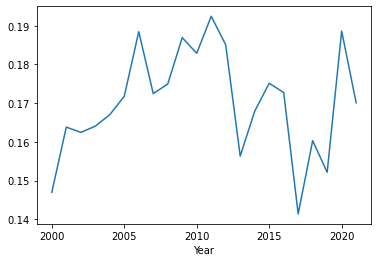

In [28]:
Mean["Liveness"].plot()
print("Many flucatuations but range was very small at 0.05.")

Loudness increased then dropped with the max being during 2010 time.


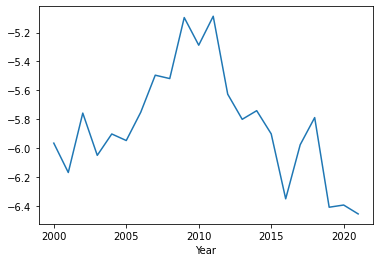

In [27]:
Mean["Loudness"].plot()
print("Loudness increased then dropped with the max being during 2010 time.")


Nothing consistence except for higher values in 2004 time. But very similar values throughout the whole period with the  range being 0.06.


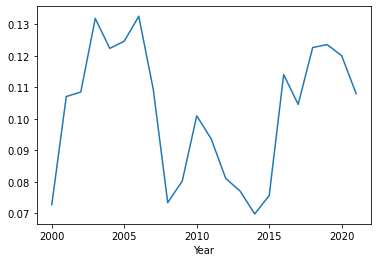

In [26]:
Mean["Speechiness"].plot()
print("Nothing consistence except for higher values in 2004 time. But very similar values throughout the whole period with the  range being 0.06.")
      

<AxesSubplot:xlabel='Year'>

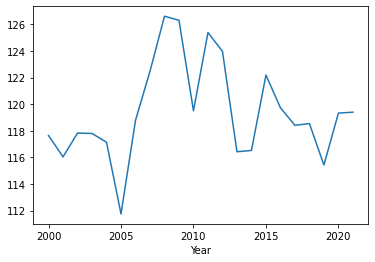

In [22]:
Mean["Tempo"].plot()
print("Tempo fluctuates but has a slight rise around 2010.")

Valence has decreased over time with a slight rise towards the end.


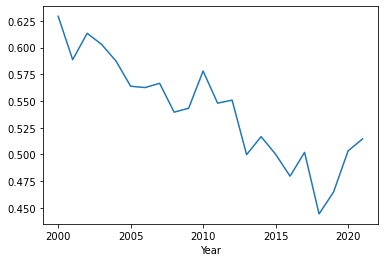

In [24]:
Mean["Valence"].plot()
print("Valence has decreased over time with a slight rise towards the end.")